In [8]:
import numpy as np
import scipy.stats as ss
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

***data***

In [2]:
train_data = pd.read_pickle('../data/cleaned_train_data.pkl')
train_data

,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,...,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500


In [3]:
numerical_features = train_data.select_dtypes(include=np.number)
numerical_features.columns

Index(['mssubclass', 'lotfrontage', 'lotarea', 'overallqual', 'overallcond',
       'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2',
       'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces',
       'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf',
       'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval',
       'mosold', 'yrsold', 'saleprice'],
      dtype='object')

In [4]:
numerical_features.select_dtypes(include=np.float64).columns

Index(['lotfrontage', 'masvnrarea', 'garageyrblt'], dtype='object')

In [5]:
numerical_features.select_dtypes(include=np.int64).columns

Index(['mssubclass', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt',
       'yearremodadd', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf',
       '1stflrsf', '2ndflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath',
       'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr',
       'totrmsabvgrd', 'fireplaces', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea',
       'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')

In [6]:
change_dtypes_to = {'garageyrblt':'int64',
                    'lotarea':'float64',
                    'grlivarea':'float64',
                    'bsmtfinsf1':'float64',
                    'bsmtfinsf2':'float64',
                    'bsmtunfsf':'float64',
                    'totalbsmtsf':'float64',
                    '1stflrsf':'float64',
                    '2ndflrsf':'float64',
                    'lowqualfinsf':'float64',
                    'garagearea':'float64',
                    'wooddecksf':'float64',
                    'openporchsf':'float64',
                    'enclosedporch':'float64',
                    '3ssnporch':'float64',
                    'screenporch':'float64',
                    'poolarea':'float64',
                    'miscval':'float64',
                    'saleprice':'float64'}
numerical_features = numerical_features.astype(change_dtypes_to)

In [19]:
numerical_features.select_dtypes(include=np.float64).columns,numerical_features.select_dtypes(include=np.int64).columns

(Index(['lotfrontage', 'lotarea', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2',
        'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
        'grlivarea', 'garagearea', 'wooddecksf', 'openporchsf', 'enclosedporch',
        '3ssnporch', 'screenporch', 'poolarea', 'miscval', 'saleprice'],
       dtype='object'),
 Index(['mssubclass', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
        'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr',
        'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garageyrblt',
        'garagecars', 'mosold', 'yrsold'],
       dtype='object'))

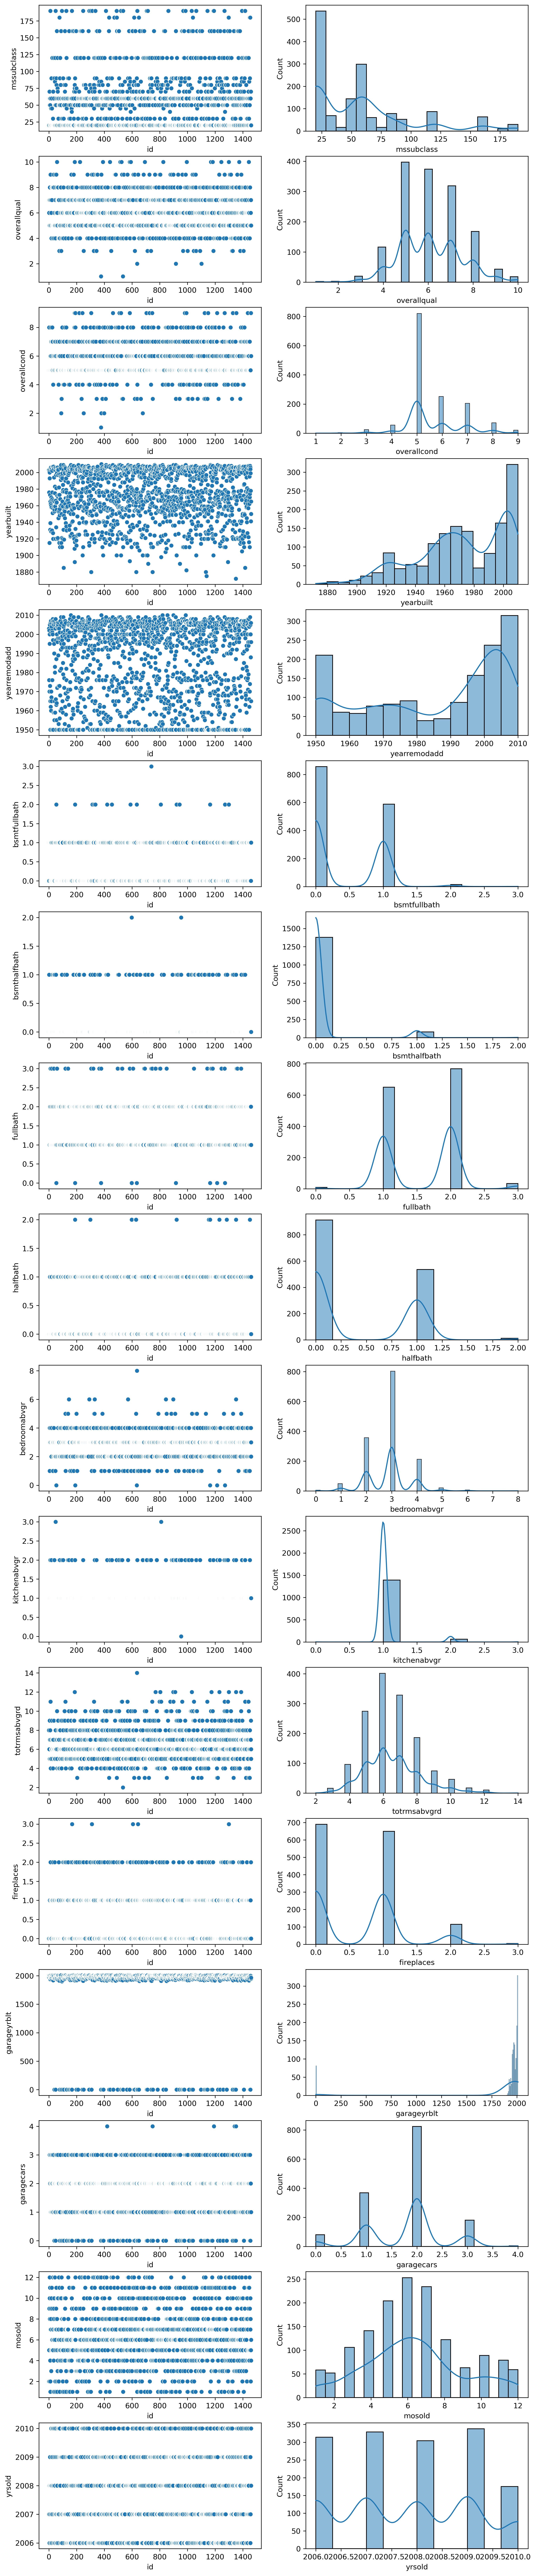

In [30]:
# uniform distribution
discrete_features = numerical_features.select_dtypes(include=np.int64).columns
fig,axes = plt.subplots(nrows=len(discrete_features),ncols=2,sharex=False,figsize=[12,64],dpi=300)

for i in range(len(discrete_features)):
    sns.scatterplot(data=numerical_features[discrete_features[i]],ax=axes[i,0])

for i in range(len(discrete_features)):
    sns.histplot(numerical_features[discrete_features[i]],kde=True,ax=axes[i,1])

plt.savefig('./uniform_dist.jpg')
plt.show()